In [10]:
# -*- encoding: utf-8 -*-
"""
@File   :   plt.py
@Desc   :   畫loss圖py
"""

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import csv

#!['global_step', 'train_loss', 'eval_loss', 'precision', 'recall', 'f1_score']

In [11]:
data = []
with open(
    "out/week12/bertweet-base/Fold1/training_progress_scores.csv", "r", newline="",) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append(row)
# print(data)
print((len(data)))


41


In [12]:
epochs = []
for i in range(1, len(data) // 2 + 1):
    epochs.append(i)
global_step, train_loss, eval_loss, precision, recall, f1_score, ma_f1, mi_f1 = [], [], [], [], [], [], [], []
for i in range(1, len(data), 2):
    global_step.append(round(float(data[i][0]), 2))
    train_loss.append(round(float(data[i][1]), 2))
    eval_loss.append(round(float(data[i][2]), 2))
    precision.append(round(float(data[i][3]), 2))
    recall.append(round(float(data[i][4]), 2))
    f1_score.append(round(float(data[i][5]), 2))
    ma_f1.append(round(float(data[i][6]), 2))
    mi_f1.append(round(float(data[i][7]), 2))
print("global_step", global_step)
x_text, y1_text = epochs, train_loss
y2_text = eval_loss
y3_text = ma_f1
y4_text = mi_f1
# print(x_text, y1_text, y2_text)

global_step [210.0, 420.0, 630.0, 840.0, 1050.0, 1260.0, 1470.0, 1680.0, 1890.0, 2100.0, 2310.0, 2520.0, 2730.0, 2940.0, 3150.0, 3360.0, 3570.0, 3780.0, 3990.0, 4200.0]


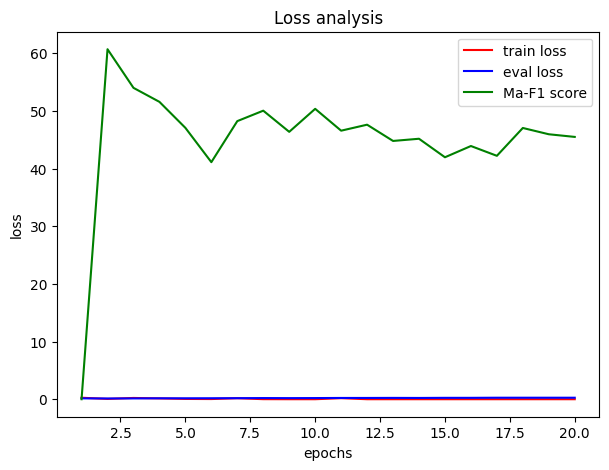

In [13]:
fig = plt.figure(figsize=(7, 5))  # figsizea調節創建窗口的大小
# p1 = pl.plot(x_text, y_text, 'r', label = u'eval_loss')
pl.plot(x_text, y1_text, color="red", label=u"train loss")
pl.plot(x_text, y2_text, color="blue", label=u"eval loss")
pl.plot(x_text, y3_text, color="green", label=u"Ma-F1 score")
# pl.plot(x_text, y4_text, color="orange", label=u"Mi-F1")
pl.legend()
# pl.style.use("ggplot")
pl.xlabel(u"epochs")
pl.ylabel(u"loss")
plt.title("Loss analysis")
# pl.savefig("image/loss-analysis")
pl.show()

In [1]:
# -*- encoding: utf-8 -*-
"""
@ here to Check how long sentences are so that we can pad them
"""
import pandas as pd
df_train = pd.read_csv('data/_SemEval2023_/4fold_test.csv')
df_train = df_train[['sentence_id','words','labels']]
df_train

,sentence_id,words,labels
0,0,Sleep,O
1,0,Disturbances,O
2,0,and,O
3,0,Propranolol,O
4,0,Does,O
...,...,...,...
20080,104,available,O
20081,104,which,O
20082,104,is,O
20083,104,really,O


In [2]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["words"].values.tolist(),
                                                        s["labels"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [3]:
getter = SentenceGetter(df_train)
sentences = getter.sentences
maxlen = max([len(s) for s in sentences])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 1111


平均長度為 =  153.2


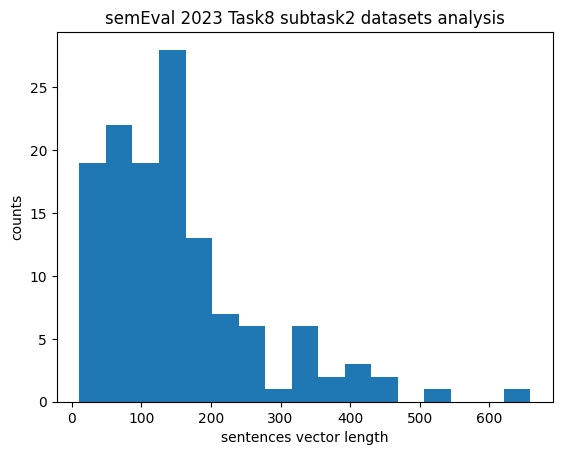

In [4]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use("ggplot")
total_s = 0
sentenceslen = [len(s) for s in sentences]
for s in sentenceslen:
    print
    total_s += s
print('平均長度為 = ', total_s/len(sentences))
plt.hist([len(s) for s in sentences], bins='auto')
plt.xlabel(u"sentences vector length")
plt.ylabel(u"counts")
plt.title("semEval 2023 Task8 subtask2 datasets analysis")
plt.savefig('semEval 2023 Task8 subtask2 datasets analysis.jpg')
plt.show()

In [18]:
words = list(set(df_train["words"].values))
words.append("ENDPAD")
n_words = len(words); n_words

10414

In [19]:
tags = list(set(df_train["labels"].values))
n_tags = len(tags); n_tags

4